In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# please let this base be automap...
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date)\
.order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_prcp = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_prcp

('2017-08-23',)

In [11]:
# Calculate the date one year from the last date in data set.
year_prcp = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
year_prcp

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date > '2016-08-23').\
order_by(Measurement.date).all()

prcp_results

[(0.08, '2016-08-24'),
 (2.15, '2016-08-24'),
 (2.28, '2016-08-24'),
 (None, '2016-08-24'),
 (1.22, '2016-08-24'),
 (2.15, '2016-08-24'),
 (1.45, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.0, '2016-08-25'),
 (0.21, '2016-08-25'),
 (0.06, '2016-08-25'),
 (0.11, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.03, '2016-08-26'),
 (0.02, '2016-08-26'),
 (0.04, '2016-08-26'),
 (0.0, '2016-08-26'),
 (0.01, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.18, '2016-08-27'),
 (0.02, '2016-08-27'),
 (0.0, '2016-08-27'),
 (0.12, '2016-08-27'),
 (None, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.14, '2016-08-28'),
 (0.6, '2016-08-28'),
 (2.07, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.17, '2016-08-29'),
 (0.04, '2016-08-29'),
 (None, '2016-08-29'),
 (0.0, '2016-08-29'),
 (0.35, '2016-08-29'),
 (0.9, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.02, '2016-08-30'),
 (0.0, '2016-08-30'),
 (0.0, '2016-08-30'),
 (

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['Precipitation', 'Date']
prcp_df = pd.DataFrame(prcp_results, columns = columns)
prcp_df

,Precipitation,Date
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24
...,...,...
2218,0.50,2017-08-22
2219,0.00,2017-08-23
2220,0.00,2017-08-23
2221,0.08,2017-08-23


In [14]:
# Sort the dataframe by date
prcp_df_dates = prcp_df.sort_values(by = 'Date')
prcp_df_dates

,Precipitation,Date
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24
...,...,...
2218,0.50,2017-08-22
2221,0.08,2017-08-23
2219,0.00,2017-08-23
2220,0.00,2017-08-23


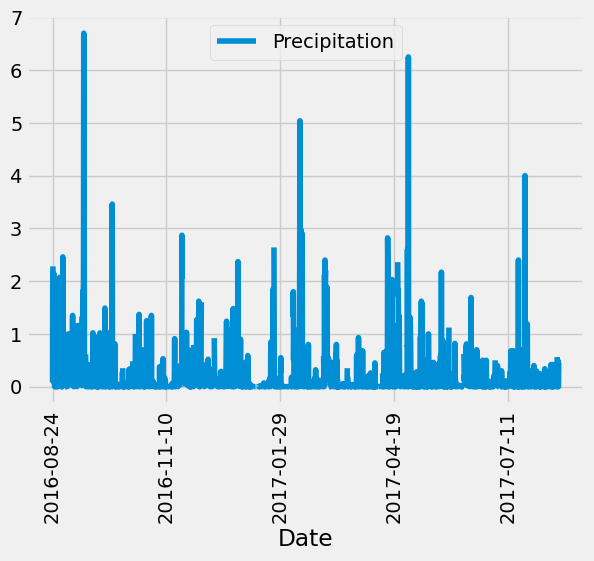

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
# making the plot
prcp_df_dates.plot(x='Date', grid = True)
# make it cleaner
plt.xticks(rotation = 90)
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df_dates.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# use Measurement class
# find stations, isolate stations (group_by), order in descending (order_by)
most_stations = session.query(Measurement.station , func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                            func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# find the last date of the station
station_date = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').\
                order_by(Measurement.date.desc()).first()
station_date

('2017-08-18',)

In [21]:
# find the date a year ago like above
year_station = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
year_station

datetime.date(2016, 8, 18)

In [22]:
# query the data now
station_data = session.query(Measurement.tobs, Measurement.date).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= '2016-8-18').all()

station_data

[(72.0, '2017-01-01'),
 (70.0, '2017-01-02'),
 (64.0, '2017-01-03'),
 (63.0, '2017-01-04'),
 (63.0, '2017-01-05'),
 (62.0, '2017-01-06'),
 (70.0, '2017-01-07'),
 (70.0, '2017-01-08'),
 (62.0, '2017-01-09'),
 (62.0, '2017-01-10'),
 (63.0, '2017-01-11'),
 (65.0, '2017-01-12'),
 (69.0, '2017-01-13'),
 (77.0, '2017-01-14'),
 (70.0, '2017-01-15'),
 (74.0, '2017-01-16'),
 (69.0, '2017-01-17'),
 (72.0, '2017-01-18'),
 (71.0, '2017-01-19'),
 (69.0, '2017-01-20'),
 (71.0, '2017-01-21'),
 (71.0, '2017-01-22'),
 (72.0, '2017-01-23'),
 (72.0, '2017-01-24'),
 (69.0, '2017-01-25'),
 (70.0, '2017-01-26'),
 (66.0, '2017-01-27'),
 (65.0, '2017-01-28'),
 (69.0, '2017-01-29'),
 (68.0, '2017-01-30'),
 (68.0, '2017-01-31'),
 (68.0, '2017-02-01'),
 (59.0, '2017-02-02'),
 (60.0, '2017-02-03'),
 (70.0, '2017-02-04'),
 (73.0, '2017-02-05'),
 (75.0, '2017-02-06'),
 (64.0, '2017-02-07'),
 (59.0, '2017-02-08'),
 (59.0, '2017-02-09'),
 (62.0, '2017-02-10'),
 (68.0, '2017-02-11'),
 (70.0, '2017-02-12'),
 (73.0, '20

In [23]:
# make a dataframe
columns = ['tobs', "date"]
station_df = pd.DataFrame(station_data, columns = columns)
station_df

,tobs,date
0,72.0,2017-01-01
1,70.0,2017-01-02
2,64.0,2017-01-03
3,63.0,2017-01-04
4,63.0,2017-01-05
...,...,...
216,77.0,2017-08-14
217,77.0,2017-08-15
218,76.0,2017-08-16
219,76.0,2017-08-17


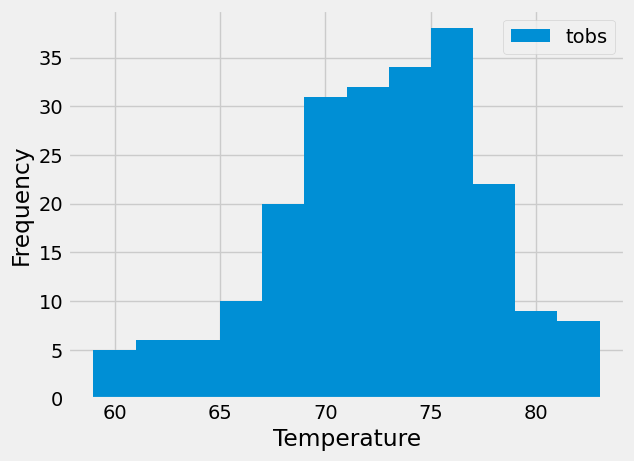

In [24]:
# making the histogram
plt.hist(x = station_df['tobs'], bins = 12)
# adding labels
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(["tobs"])

plt.show()

# Close Session

In [25]:
# Close Session
session.close()